In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [83]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "cause of death"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
data = pd.read_csv('causes-of-death.csv')
data

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8
...,...,...,...,...,...,...
10863,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Virginia,1035,16.9
10864,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Washington,278,5.2
10865,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,West Virginia,345,16.4
10866,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Wisconsin,677,11.9


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     10868 non-null  int64  
 1   113 Cause Name           10868 non-null  object 
 2   Cause Name               10868 non-null  object 
 3   State                    10868 non-null  object 
 4   Deaths                   10868 non-null  int64  
 5   Age-adjusted Death Rate  10868 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 509.6+ KB


Data is complete and it seems there are no missing data values in the dataframe. We will check the uniqueness of these columns and change them to a category datatype if needed

In [19]:
data.nunique()

Year                         19
113 Cause Name               11
Cause Name                   11
State                        52
Deaths                     5964
Age-adjusted Death Rate    2490
dtype: int64

comparitively to the number of instances in the dataset it looks like we can categorize every object column

In [20]:
for col in ['113 Cause Name', 'Cause Name', 'State']:
    data[col] = data[col].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Year                     10868 non-null  int64   
 1   113 Cause Name           10868 non-null  category
 2   Cause Name               10868 non-null  category
 3   State                    10868 non-null  category
 4   Deaths                   10868 non-null  int64   
 5   Age-adjusted Death Rate  10868 non-null  float64 
dtypes: category(3), float64(1), int64(2)
memory usage: 289.9 KB


In [21]:
data.describe()

,Year,Deaths,Age-adjusted Death Rate
count,10868.000000,1.086800e+04,10868.000000
mean,2008.000000,1.545991e+04,127.563894
std,5.477478,1.128760e+05,223.639771
min,1999.000000,2.100000e+01,2.600000
25%,2003.000000,6.120000e+02,19.200000
50%,2008.000000,1.718500e+03,35.900000
75%,2013.000000,5.756500e+03,151.725000
max,2017.000000,2.813503e+06,1087.300000


looking at the description we have some death values the far exceed the IQR, with over 1000 times more deaths. If we look at the data though from the csv we will see that a section for overall deaths, with all causes for the nation is summarized. for example we look at the stats with state being labeled as united states we will see the values far exceed the IQR.

In [23]:
data_us = data[data['State'] == 'United States']
data_us

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
52,2017,All Causes,All causes,United States,2813503,731.9
104,2017,Alzheimer's disease (G30),Alzheimer's disease,United States,121404,31.0
156,2017,Cerebrovascular diseases (I60-I69),Stroke,United States,146383,37.6
208,2017,Chronic lower respiratory diseases (J40-J47),CLRD,United States,160201,40.9
...,...,...,...,...,...,...
10652,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,United States,725192,266.5
10705,1999,Influenza and pneumonia (J09-J18),Influenza and pneumonia,United States,63730,23.5
10757,1999,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,United States,29199,10.5
10808,1999,Malignant neoplasms (C00-C97),Cancer,United States,549838,200.8


we can use this data to view the overall cause of death in the nation

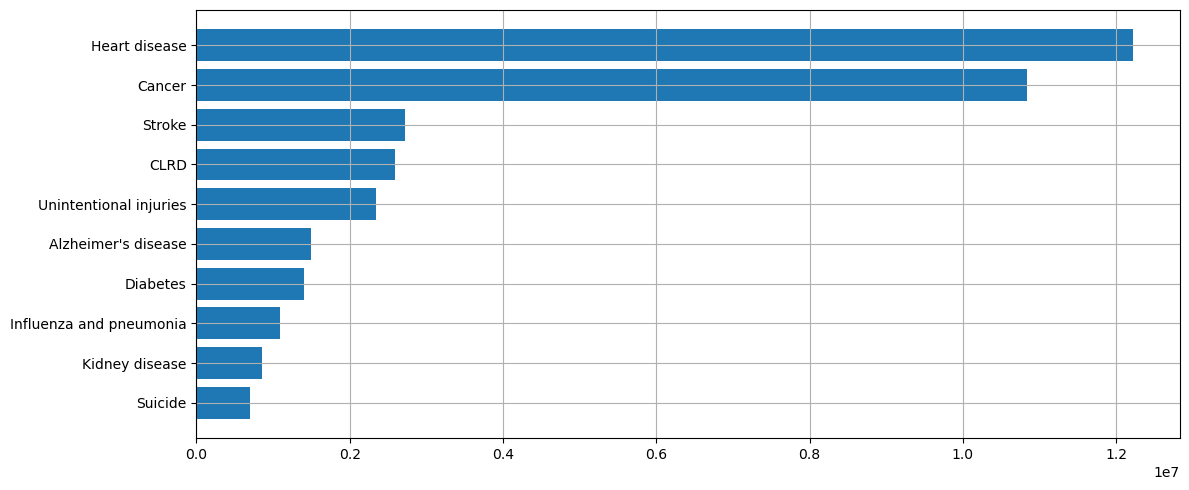

In [84]:
plt.figure(figsize=(12,5))
causes_us = data_us.groupby('Cause Name')['Deaths'].sum().sort_values(ascending=True).reset_index(name='count')
plt.barh(causes_us['Cause Name'][:-1], causes_us['count'][:-1])
plt.grid(True)
save_fig('Overall cause of death in the US')
plt.show()

So we see that heart disease is the leading cause of death in America right before that is cancer. since these values will ruin the overall distribution of causes relative to state we will remove any row with state being labelled `United States`